## **Оглавление**
* [Введение](#Введение)
* [Импорт библиотек](#Импорт-библиотек)
* [Импорт данных](#Импорт-данных)
* [Обзор данных](#Обзор-данных)
    - [train](#train)
    - [test](#test)
    - [Описание полей](#Описание-полей)
* [Анализ и очистка данных](#Анализ-и-очистка-данных)
    - [Price](#Price)
    - [Rooms](#Rooms)
    - [DistrictId](#DistrictId)
    - [Square](#Square)
    - [LifeSquare](#LifeSquare)
    - [KitchenSquare](#KitchenSquare)
    - [Floor](#Floor)
    - [HouseFloor](#HouseFloor)
    - [HouseYear](#HouseYear)
    - [Ecology_1](#Ecology_1)
    - [HouseYear](#HouseYear)
    - [Shops_2, Ecology_2, Ecology_3](#Shops_2,-Ecology_2,-Ecology_3)
    - [Social_1](#Social_1)
    - [Social_2](#Social_2)
    - [Social_3](#Social_3)
    - [Healthcare_1](#Healthcare_1)
    - [Helthcare_2](#Helthcare_2)
    - [Shops_1](#Shops_1)
* [Выбор признаков](#Выбор-признаков)
* [Настройка гиперпараметров](#Настройка-гиперпараметров)
* [Кросс-валидация](#Кросс-валидация)
* [Обучение модели](#Обучение-модели)
* [Предсказание целевой переменной Price](#Предсказание-целевой-переменной-Price)
* [Экспорт в CSV файл](#Экспорт-в-CSV-файл)

## **Введение** 

Курсовой проект для курса "Python для Data Science"

Материалы к проекту (файлы):
train.csv
test.csv

Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

Целевая переменная:
Price

Основная метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)







## **Импорт библиотек** 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100

%matplotlib inline

## **Импорт данных** 

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [3]:
train.shape, test.shape

((10000, 20), (5000, 19))

## Обзор данных
### train

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [5]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### test

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [7]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


## Описание полей

**Структура датасета: 19 переменных и 1 целевая переменная "Price"**

**Обучающая выборка состоит из 10000 наблюдений. Тестовый датасет содержит 5000 записей, не содержит переменную Price, так она целевая и ее необходимо предсказать**

    Структура датасета:
    Id               ID квартиры
    DistrictId       ID района
    Rooms            кол-во комнат
    Square           общая площадь
    LifeSquare       жилая площадь 
    KitchenSquare    площадь кухни
    Floor            этаж
    HouseFloor       сколько этажей в доме
    HouseYear        год постройки дома
    Ecology_1        какой-то экологический показатель
    Ecology_2        какой-то экологический показатель
    Ecology_3        какой-то экологический показатель
    Social_1         какой-то социальный показатель
    Social_2         какой-то социальный показатель
    Social_3         какой-то социальный показатель
    Healthcare_1     какой-то показатель здравоохранения
    Helthcare_2      какой-то показатель здравоохранения
    Shops_1          вероятно, показатель характеризующий наличие магазинов какой-то категории
    Shops_2          вероятно, показатель характеризующий наличие магазинов какой-то категории
    Price            цена квартиры (целевая переменная)

Имеются незаполненные данные в колонках Healthcare_1 и LifeSquare.

## Анализ и очистка данных

In [8]:
# список со всеми датафреймами
dfs = [(train, 'train'), (test, 'test')]

Общая площадь не может быть меньше жилой. Основываясь на этой гипотезе посмотрим во всех датасетах наблюдения, где Square меньше LifeSquare и доля общей площади от жилой меньше 0.7.

In [9]:
for df, df_name in dfs:
    print(f'Dataframe: {df_name}')
    data = df.loc[(df['Square'] < df['LifeSquare']) & ((df['Square'] / df['LifeSquare']) < 0.7)]
    display(data)

Dataframe: train


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.231857
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
6332,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,NaN,0,1,B,104891.073757
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978
9294,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,438005.182323


Dataframe: test


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
410,11533,94,2.0,48.713443,303.071094,6.0,5,12.0,1974,0.521867,B,B,25,6149,0,NaN,0,0,B
608,16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
4713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B
4902,1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B


Исправим значения вручную, близкими значениями к медиане

In [10]:
# медиана площади и цены для квартир с разным количеством комнат
train.groupby('Rooms')[['Square', 'Price']].median()

,Square,Price
Rooms,,
0.0,65.487474,214937.068787
1.0,40.406590,154979.497993
2.0,55.841812,200320.754636
3.0,77.413643,268723.157677
4.0,98.668054,377524.231990
5.0,116.084861,455355.638212
6.0,59.414334,229661.964416
10.0,59.964120,244797.297328
19.0,42.006046,78364.616704


In [11]:
train.loc[212, 'Square'] = 67
train.loc[590, 'LifeSquare'] = 47
train.loc[1608, 'Square'] = 41
train.loc[1608, 'LifeSquare'] = 40
train.loc[3280, 'Square'] = 41
train.loc[4328, 'LifeSquare'] = 80
train.loc[6332, 'LifeSquare'] = 32
train.loc[6392, 'Square'] = 37
train.loc[6392, 'LifeSquare'] = 36
train.loc[8030, 'Square'] = 80
train.loc[8437, 'LifeSquare'] = 76
train.loc[9294, 'Square'] = 50
train.loc[9294, 'LifeSquare'] = 49

test.loc[410, 'LifeSquare'] = 47
test.loc[608, 'Square'] = 43
test.loc[608, 'LifeSquare'] = 42
test.loc[4713, 'Square'] = 62
test.loc[4902, 'Square'] = 42
test.loc[4902, 'LifeSquare'] = 41

А теперь где доля общей площади от жилой больше 0.7

In [12]:
train.loc[(train['Square'] < train['LifeSquare']) & ((train['Square'] / train['LifeSquare']) > 0.7), :].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284


Тут, вероятно, оператор перепутал местами жилую и общую площади.

In [13]:
train.loc[(train['Square'] < train['LifeSquare']) & ((train['Square'] / train['LifeSquare']) > 0.7), 'Id'].count()

473

Поменяем в этих 473 наблюдениях местами переменные Square и LifeSquare

In [14]:
def swap_area(df):
    """
    Меняет местами Square и LifeSquare, если общая площадь меньше жилой и доля общей площади превышает 0.7 от жилой
    """
    data = df.loc[(df['Square'] < df['LifeSquare']) & ((df['Square'] / df['LifeSquare']) > 0.7), \
                      ['Square', 'LifeSquare']].values
    df.loc[(df['Square'] < df['LifeSquare']) & ((df['Square'] / df['LifeSquare']) > 0.7), \
              ['LifeSquare', 'Square']] = data
    return df

In [15]:
train = swap_area(train)
test = swap_area(test)

### Price

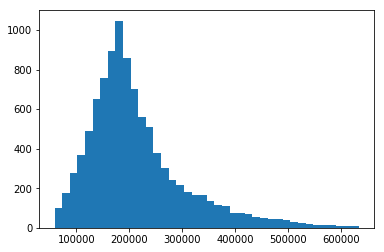

In [16]:
plt.hist(train['Price'], bins=40);

На гистограмме видно смещенное вправо распределение. Логарифмирование переменной ухудшило точность модели, поэтому используем как есть.

### Rooms

In [17]:
train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

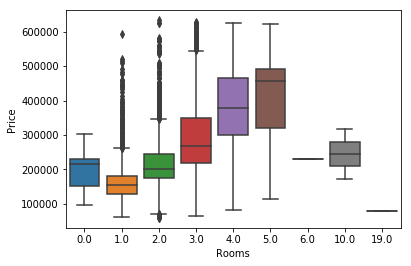

In [18]:
sns.boxplot(train['Rooms'], train['Price']);

Наблюдения, где Rooms = 0,6,10,19 похожи на выбросы. Восстановим, отталкиваясь от среднего значения площади или цены для разных квартир.

In [19]:
train.loc[(train['Rooms'] <= 5) & (train['Rooms'] != 0)].groupby('Rooms')[['Square', 'Price']].mean()

,Square,Price
Rooms,,
1.0,41.459319,159850.800729
2.0,56.869232,215256.306416
3.0,77.007562,289337.962452
4.0,98.453655,383251.100956
5.0,122.614941,410431.605679


#### Rooms > 5 

In [20]:
for df, df_name in dfs:
    print(f'Dataframe: {df_name}')
    data = df.loc[df['Rooms'] > 5]
    display(data)

Dataframe: train


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


Dataframe: test


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,NaN,0,0,B
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,NaN,1,4,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [21]:
train.loc[377, 'Rooms'] = 2
train.loc[1454, 'Rooms'] = 1
train.loc[2170, 'Rooms'] = 2
train.loc[8849, 'Rooms'] = 2

test.loc[2071, 'Rooms'] = 4
test.loc[3217, 'Rooms'] = 5
test.loc[3398, 'Rooms'] = 2

#### Rooms == 0

In [22]:
for df, df_name in dfs:
    print(f'Dataframe: {df_name}')
    data = df.loc[df['Rooms'] == 0]
    display(data)

Dataframe: train


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


Dataframe: test


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


In [23]:
train.loc[1397, 'Rooms'] = 4
train.loc[1981, 'Rooms'] = 5
train.loc[2269, 'Rooms'] = 1
train.loc[3911, 'Rooms'] = 2
train.loc[4366, 'Rooms'] = 3
train.loc[4853, 'Rooms'] = 1
train.loc[6149, 'Rooms'] = 1
train.loc[8834, 'Rooms'] = 3


test.loc[2406, 'Rooms'] = 4
test.loc[2524, 'Rooms'] = 3

После чистки:

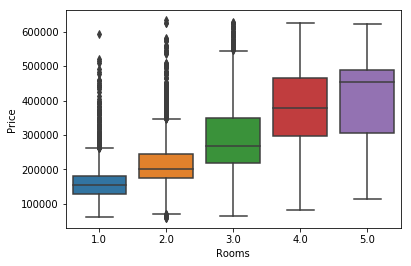

In [24]:
sns.boxplot(train['Rooms'], train['Price']);

### DistrictId

Категориальная переменная. Преобразуем в псевдопеременную

In [25]:
mean_price1 = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean()
mean_price1 = mean_price1.rename(columns={'Price':'mean_price_by_district'})
mean_price1.head()

,DistrictId,Rooms,mean_price_by_district
0,0,1.0,141262.601991
1,0,2.0,197998.146681
2,0,3.0,304170.518823
3,1,1.0,147186.814704
4,1,2.0,198777.278269


In [26]:
mean_price2 = train.groupby('Rooms', as_index=False)[['Price']].mean()
mean_price2 = mean_price2.rename(columns={'Price':'mean_price_by_district'})
mean_price2

,Rooms,mean_price_by_district
0,1.0,159802.994431
1,2.0,215275.678371
2,3.0,289272.459900
3,4.0,382490.462833
4,5.0,404735.798058


In [27]:
train = pd.merge(train, mean_price1, on=['DistrictId', 'Rooms'], how='left')

In [28]:
train['mean_price_by_district'].isnull().sum()

0

In [29]:
test = pd.merge(test, mean_price1, on=['DistrictId', 'Rooms'], how='left')

In [30]:
test['mean_price_by_district'].isnull().sum()

65

In [31]:
for _, row in mean_price2.iterrows():
        rooms = row['Rooms']
        price = row['mean_price_by_district']
        test.loc[(test['Rooms']  == rooms) & (test['mean_price_by_district'].isnull()), 'mean_price_by_district'] = price
        

In [32]:
train['mean_price_by_district'].isnull().sum()

0

Теперь будем использовать вместо DistrictId новую псевдопеременную mean_price_by_district

### Square

Построим диаграмму рассеяности

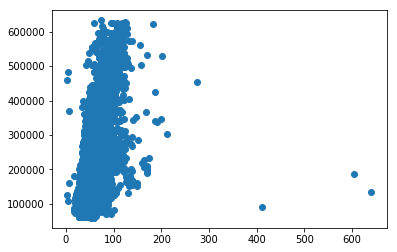

In [33]:
plt.scatter(train['Square'], train['Price']);

Квартиры с площадью > 250 кв.м. выбиваются из распредения и похожи на выбросы.
Также на графике видны квартиры < ~12 кв.м., которые тоже похожи на выбросы. Изучим более детально.

#### > 200 кв.м.

In [34]:
train.groupby('Rooms')['Square', 'Price'].mean()

,Square,Price
Rooms,,
1.0,41.448274,159802.994431
2.0,56.869579,215275.678371
3.0,77.014375,289272.459900
4.0,98.718384,382490.462833
5.0,127.368490,404735.798058


In [35]:
for df, df_name in dfs:
    print(f'Dataframe: {df_name}')
    data = df.loc[df['Square'] > 200, :]
    display(data)

Dataframe: train


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,5.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,410.639749,409.425181,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
9910,16568,27,4.0,201.627361,200.334539,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,NaN,1,4,B,528560.506016


Dataframe: test


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3217,4058,27,5.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,NaN,1,4,B
3909,1397,76,3.0,221.138768,118.055342,4.0,32,48.0,2011,0.000000,B,B,7,1660,39,1786.0,1,5,B


In [36]:
train.loc[4262, 'Square'] = 55
train.loc[4690, 'Square'] = 41
train.loc[4690, 'LifeSquare'] = 40
train.loc[6977, 'Square'] = 55
train.loc[6977, 'LifeSquare'] = 54

# похоже, в тестовом датасете все в порядке

#### < 20 кв.м.

На сайтах с недвижимостью удалось найти квартиры с минимальной площадью 12 кв.м., поэтому сделаем выборку квартир, у которых Square < 12, и будем считать результаты потенциальными выбросами.

In [37]:
for df, df_name in dfs:
    print(f'Dataframe: {df_name}')
    data = df.loc[df['Square'] <= 15, :]
    display(data)

Dataframe: train


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
3413,9487,5,1.0,5.549458,5.129222,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4853,3224,27,1.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
4900,4504,27,3.0,5.610772,4.390331,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
8283,15744,34,1.0,2.642219,1.988943,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,NaN,1,11,B,458378.777006
9613,7657,38,1.0,4.618547,4.502784,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,520.0,0,7,B,483283.488083


Dataframe: test


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
837,2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
1165,10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
3697,15435,21,1.0,13.305531,9.495367,0.0,6,5.0,1965,0.194489,B,B,47,8004,3,125.0,3,5,B
4490,1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B
4540,7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,540.0,0,0,B


In [38]:
train.loc[1316, 'Square'] = 46
train.loc[1316, 'LifeSquare'] = 45
train.loc[3413, 'Square'] = 55
train.loc[3413, 'LifeSquare'] = 51
train.loc[4853, 'Square'] = 40
train.loc[4853, 'LifeSquare'] = 39
train.loc[4900, 'Square'] = 70
train.loc[4900, 'LifeSquare'] = 69
train.loc[8283, 'Square'] = 52
train.loc[8283, 'LifeSquare'] = 51
train.loc[9613, 'Square'] = 53
train.loc[9613, 'LifeSquare'] = 52

test.loc[66, 'Square'] = 42
test.loc[66, 'LifeSquare'] = 41
test.loc[837, 'Square'] = 56
test.loc[837, 'LifeSquare'] = 54
test.loc[1165, 'Square'] = 51 
test.loc[1165, 'LifeSquare'] = 50
test.loc[4490, 'Square'] = 40
test.loc[4490, 'LifeSquare'] = 39
test.loc[4540, 'Square'] = 49
test.loc[4540, 'LifeSquare'] = 48

Диаграмма рассеяности после чистки

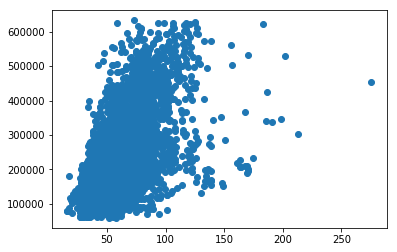

In [39]:
plt.scatter(train['Square'], train['Price']);

Теперь этот признак будем использовать для обучения модели.

### LifeSquare

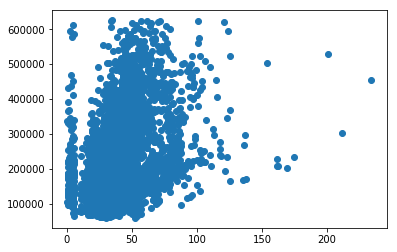

In [40]:
plt.scatter(train['LifeSquare'], train['Price']);

Заполним отсутствующие значения LifeSquare 80-ю провентами от Square

In [41]:
def fill_lifesquare(df):
    df.loc[df.loc[:, 'LifeSquare'].isnull(), 'LifeSquare'] = \
    df.loc[df.loc[:, 'LifeSquare'].isnull(), 'Square'] * 0.8
    return df

In [42]:
train = fill_lifesquare(train)
test = fill_lifesquare(test)

### KitchenSquare

In [43]:
train['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [44]:
for df, df_name in dfs:
    print(f'Dataframe: {df_name}')
    data = df.loc[df['KitchenSquare'] > df['Square']]
    display(data)

Dataframe: train


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
5149,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165
7088,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


Dataframe: test


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1964,14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,1015.0,2,5,B
2424,10662,29,1.0,25.956829,17.251768,33.0,5,5.0,1973,0.069660,B,B,31,6119,4,NaN,1,2,B
3863,3194,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,B,B,10,2277,2,1547.0,0,0,B
4555,12640,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B


In [45]:
train.loc[1064, 'KitchenSquare'] = 10
train.loc[5149, 'KitchenSquare'] = 8
train.loc[7088, 'KitchenSquare'] = 8
train.loc[8584, 'KitchenSquare'] = 8

test.loc[1964, 'KitchenSquare'] = 10
test.loc[2424, 'KitchenSquare'] = 5
test.loc[3863, 'KitchenSquare'] = 7
test.loc[4555, 'KitchenSquare'] = 8

### Floor

In [46]:
for df in [train, test]:
    display(df['Floor'].describe())

count    10000.000000
mean         8.526700
std          5.241148
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         42.000000
Name: Floor, dtype: float64

count    5000.000000
mean        8.632000
std         5.483228
min         1.000000
25%         4.000000
50%         7.000000
75%        12.000000
max        78.000000
Name: Floor, dtype: float64

### HouseFloor

In [47]:
for df in [train, test]:
    display(df['HouseFloor'].describe())

count    10000.000000
mean        12.609400
std          6.775974
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64

count    5000.000000
mean       12.601000
std         6.789213
min         0.000000
25%         9.000000
50%        12.000000
75%        17.000000
max        99.000000
Name: HouseFloor, dtype: float64

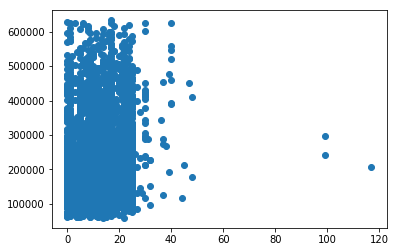

In [48]:
plt.scatter(train['HouseFloor'], train['Price']);

Больше 80 похожи на выбросы.

In [49]:
for df, df_name in dfs:
    print(f'Dataframe: {df_name}')
    data = df.loc[df['HouseFloor'] > 80]
    display(data)

Dataframe: train


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944587,48.709601,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,296127.115515
8599,9300,74,2.0,74.579809,71.747869,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,243329.912579
8854,78,30,2.0,66.811789,65.773749,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.370520


Dataframe: test


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
651,15864,27,3.0,47.722835,47.098813,9.0,18,99.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A


In [50]:
train.loc[6131, 'HouseFloor'] = 17
train.loc[8599, 'HouseFloor'] = 17
train.loc[8854, 'HouseFloor'] = 17


test.loc[651, 'HouseFloor'] = 17

### HouseYear

In [51]:
train['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

2.005201e+07 слишком большое значение для года, очевидно выброс. Сделаем выборку HouseFloor > 2020

In [52]:
for df, df_name in dfs:
    print(f'Dataframe: {df_name}')
    data = df.loc[df['HouseYear'] > 2020]
    display(data)

Dataframe: train


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


Dataframe: test


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [53]:
train.loc[1497, 'HouseYear'] = 2008
train.loc[4189, 'HouseYear'] = 1968

### Ecology_1

In [54]:
for df, _ in dfs:
    display(df['Ecology_1'].describe())

count    10000.000000
mean         0.118858
std          0.119025
min          0.000000
25%          0.017647
50%          0.075424
75%          0.195781
max          0.521867
Name: Ecology_1, dtype: float64

count    5000.000000
mean        0.119874
std         0.120070
min         0.000000
25%         0.019509
50%         0.072158
75%         0.195781
max         0.521867
Name: Ecology_1, dtype: float64

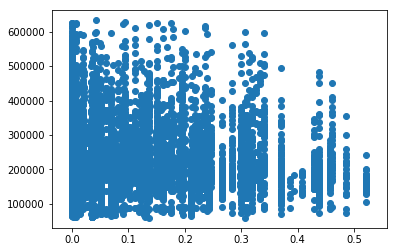

In [55]:
plt.scatter(train['Ecology_1'], train['Price']);

Используем признак как есть

### Shops_2, Ecology_2, Ecology_3

In [56]:
train.select_dtypes(include='object').columns

Index(['Ecology_2', 'Ecology_3', 'Shops_2'], dtype='object')

Преобразуем в dummy переменные

In [57]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

### Social_1

In [58]:
for df, df_name in dfs:
    print(f'Dataframe: {df_name}')
    display(df['Social_1'].describe())

Dataframe: train


count    10000.000000
mean        24.687000
std         17.532614
min          0.000000
25%          6.000000
50%         25.000000
75%         36.000000
max         74.000000
Name: Social_1, dtype: float64

Dataframe: test


count    5000.000000
mean       24.933800
std        17.532202
min         0.000000
25%         6.000000
50%        25.000000
75%        36.000000
max        74.000000
Name: Social_1, dtype: float64

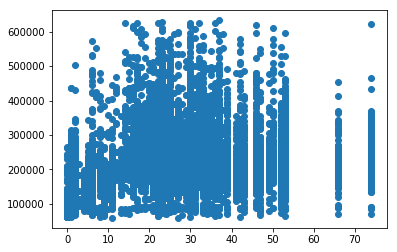

In [59]:
plt.scatter(train['Social_1'], train['Price'])

Используем признак как есть

### Social_2

In [60]:
for df, df_name in dfs:
    print(f'Dataframe: {df_name}')
    display(df['Social_2'].describe())

Dataframe: train


count    10000.000000
mean      5352.157400
std       4006.799803
min        168.000000
25%       1564.000000
50%       5285.000000
75%       7227.000000
max      19083.000000
Name: Social_2, dtype: float64

Dataframe: test


count     5000.000000
mean      5406.900000
std       4026.614773
min        168.000000
25%       1564.000000
50%       5285.000000
75%       7287.000000
max      19083.000000
Name: Social_2, dtype: float64

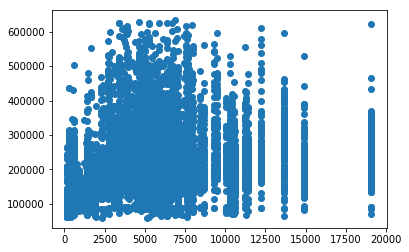

In [61]:
plt.scatter(train['Social_2'], train['Price']);

Используем признак как есть

### Social_3

In [62]:
for df, df_name in dfs:
    print(f'Dataframe: {df_name}')
    display(df['Social_3'].describe())

Dataframe: train


count    10000.000000
mean         8.039200
std         23.831875
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max        141.000000
Name: Social_3, dtype: float64

Dataframe: test


count    5000.000000
mean        8.262600
std        23.863762
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max       141.000000
Name: Social_3, dtype: float64

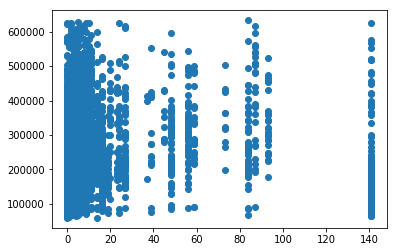

In [63]:
plt.scatter(train['Social_3'], train['Price']);

Используем признак как есть

### Healthcare_1

In [64]:
train['Healthcare_1'].describe()

count    5202.000000
mean     1142.904460
std      1021.517264
min         0.000000
25%       350.000000
50%       900.000000
75%      1548.000000
max      4849.000000
Name: Healthcare_1, dtype: float64

 Не используем, слишком много пропущенных данных

### Helthcare_2

In [65]:
for df, df_name in dfs:
    print(f'Dataframe: {df_name}')
    display(df['Helthcare_2'].describe())

Dataframe: train


count    10000.000000
mean         1.319500
std          1.493601
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: Helthcare_2, dtype: float64

Dataframe: test


count    5000.00000
mean        1.31940
std         1.47994
min         0.00000
25%         0.00000
50%         1.00000
75%         2.00000
max         6.00000
Name: Helthcare_2, dtype: float64

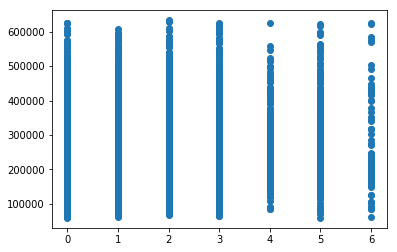

In [66]:
plt.scatter(train['Helthcare_2'], train['Price']);

Используем признак как есть

### Shops_1

In [67]:
for df, df_name in dfs:
    print(f'Dataframe: {df_name}')
    display(df['Shops_1'].describe())

Dataframe: train


count    10000.000000
mean         4.231300
std          4.806341
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         23.000000
Name: Shops_1, dtype: float64

Dataframe: test


count    5000.000000
mean        4.242800
std         4.777365
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        23.000000
Name: Shops_1, dtype: float64

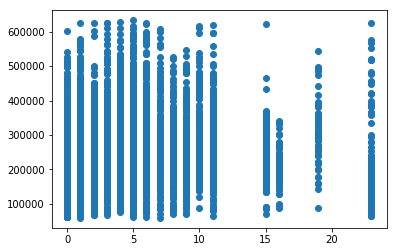

In [68]:
plt.scatter(train['Shops_1'], train['Price']);

Используем признак как есть

## Выбор признаков

Итоговый список признаков для обучения модели таков:

In [69]:
# признаки для модели
fts = ['mean_price_by_district', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B',
       'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']

# целевая переменная
target_var = ['Price']

In [70]:
# обучающая выборка
X_train = train[fts]
y_train = train[target_var]

In [71]:
# тестовая выборка
X_test = test[fts]

## Настройка-гиперпараметров

In [72]:
# наилучшие гиперпараметры, полученные с помощью GridSearchCV
best_params = {'max_depth': 16, 'max_features': 11, 'n_estimators': 645}

## Кросс-валидация

In [73]:
reg = RandomForestRegressor(**best_params, random_state=1, n_jobs=-1)
scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2', n_jobs=-1)

In [74]:
# r2_score
scores.mean()

0.7764233730114432

## Обучение модели

In [75]:
reg = RandomForestRegressor(**best_params, random_state=1, n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features=11, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=645, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

## Предсказание целевой переменной Price

In [76]:
test['Price'] = reg.predict(X_test)

Посмотрим на диаграмму рассеяности предсказанной переменной и площади

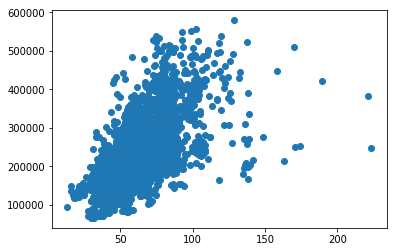

In [77]:
plt.scatter(test['Square'], test['Price']);

Нет каких-то отрицательных значений и выбросов. Выглядит резонно. Экспортируем результаты в CSV файл.

## Экспорт в CSV файл

In [78]:
test.to_csv('./output/OSapegin_predictions.csv', columns=['Id', 'Price'], index=False)